In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
train_data = pd.read_csv('train1k.csv', skiprows=[0], header = None)
test_data = pd.read_csv('test1k.csv', skiprows=[0], header = None)

train_labels = train_data[0]
train_images = train_data.drop(train_data.columns[0], axis=1)

test_labels = test_data[0]
test_images = test_data.drop(test_data.columns[0], axis=1)




In [30]:
def nearest_mean(data):
    nearest_means = train_data.groupby(train_data.columns[0]).mean()
    return nearest_means
    
    
nearest_mean_array = nearest_mean(train_data)
nearest_mean_array

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,,,,,,,,,,,,,,,,,,,,,
0,0.03,0.34,0.25,0.03,0.14,0.18,0.16,0.05,1.73,2.17,...,0.23,0.25,0.21,0.13,0.07,0.25,0.0,0.00,0.00,0.0
1,0.03,0.00,0.06,0.03,0.00,0.06,0.16,0.00,2.10,1.49,...,0.05,0.06,0.13,0.08,0.01,0.06,0.0,0.00,0.00,0.0
2,0.33,0.44,0.81,0.40,0.50,0.60,0.53,0.84,2.34,3.17,...,0.18,0.03,0.08,0.14,0.13,0.00,0.0,0.00,0.00,0.0
3,0.60,0.59,0.56,0.36,0.52,0.57,0.66,0.22,2.32,2.43,...,0.50,0.30,0.30,0.53,0.46,0.09,0.0,0.00,0.00,0.0
4,0.72,0.25,0.38,0.11,0.15,0.31,0.28,0.39,1.44,1.65,...,1.28,0.50,0.25,0.54,0.62,0.45,0.0,0.00,0.00,0.0
5,0.43,0.11,0.07,0.20,0.18,0.23,0.12,0.23,1.74,1.88,...,0.40,0.47,0.37,0.40,0.16,0.09,0.0,0.00,0.00,0.0
6,0.03,0.00,0.08,0.14,0.00,0.12,0.04,0.00,1.66,3.90,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0
7,0.49,0.24,0.42,0.32,0.54,0.41,0.53,0.33,1.08,1.23,...,1.89,0.68,0.33,0.59,0.62,0.79,0.0,0.00,0.00,0.0
8,0.17,0.22,0.04,0.24,0.06,0.17,0.15,0.14,2.50,1.40,...,0.70,0.21,0.45,0.86,0.43,0.20,0.0,0.00,0.00,0.0


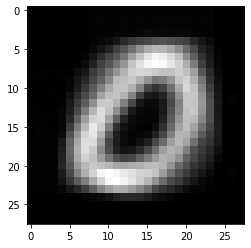

In [31]:
nearest_mean_np = np.array(nearest_mean_array)

zero_mean = nearest_mean_np[0]
zero_mean = np.reshape(zero_mean,(28,28))
plt.imshow(zero_mean,cmap = 'gray')

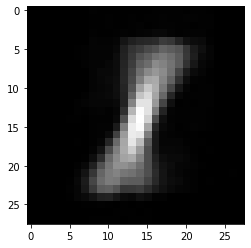

In [32]:
one_mean = nearest_mean_np[1]
one_mean = np.reshape(one_mean,(28,28))
plt.imshow(one_mean,cmap = 'gray')

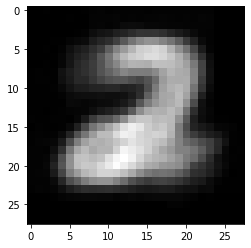

In [33]:
two_mean = nearest_mean_np[2]
two_mean = np.reshape(two_mean,(28,28))
plt.imshow(two_mean,cmap = 'gray')

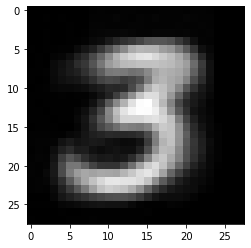

In [34]:
three_mean = nearest_mean_np[3]
three_mean = np.reshape(three_mean,(28,28))
plt.imshow(three_mean,cmap = 'gray')

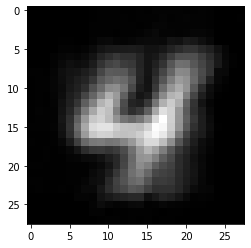

In [35]:
four_mean = nearest_mean_np[4]
four_mean = np.reshape(four_mean,(28,28))
plt.imshow(four_mean,cmap = 'gray')

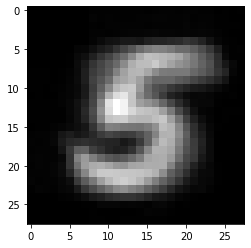

In [36]:
five_mean = nearest_mean_np[5]
five_mean = np.reshape(five_mean,(28,28))
plt.imshow(five_mean,cmap = 'gray')

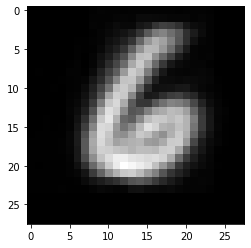

In [37]:
six_mean = nearest_mean_np[6]
six_mean = np.reshape(six_mean,(28,28))
plt.imshow(six_mean,cmap = 'gray')

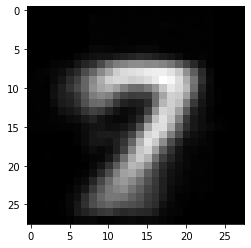

In [38]:
seven_mean = nearest_mean_np[7]
seven_mean = np.reshape(seven_mean,(28,28))
plt.imshow(seven_mean,cmap = 'gray')

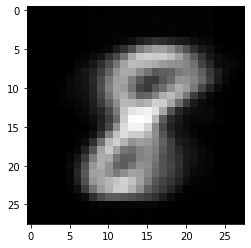

In [39]:
eight_mean = nearest_mean_np[8]
eight_mean = np.reshape(eight_mean,(28,28))
plt.imshow(eight_mean,cmap = 'gray')

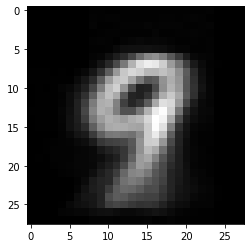

In [40]:
nine_mean = nearest_mean_np[9]
nine_mean = np.reshape(nine_mean,(28,28))
plt.imshow(nine_mean,cmap = 'gray')

In [60]:
def confusion_matrix(actual, predicted):
    
    acc = 0
    K = len(np.unique(actual))  # Number of classes
    result = np.zeros((K, K))

    for i in range(len(actual)):
        result[actual[i]][predicted[i]] += 1
        
    for i in range(len(result)):
        
        acc += result[i][i]
        
    acc = acc / 1000
    
    acc = float("{:.2f}".format(acc))
    
    return result, acc


def draw_conf_matrix(conf_matrix, acc, kval, train_or_test):
   classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

   fig, ax = plt.subplots()
   im = ax.imshow(conf_matrix)

   ax.set_xticks(np.arange(len(classes)))
   ax.set_yticks(np.arange(len(classes)))
   # ... and label them with the respective list entries
   ax.set_xticklabels(classes)
   ax.set_yticklabels(classes)

   plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
            rotation_mode="anchor")

   for i in range(len(classes)):
       for j in range(len(classes)):
           text = ax.text(j, i, conf_matrix[i, j],
                          ha="center", va="center", color="w")
   if kval == 0:
       if train_or_test == 'train':
            ax.set_title("Confusion matrix of the nearest mean classifier on train dataset \n accuracy= %" + str(acc *100))
        
       else:
            ax.set_title("Confusion matrix of the nearest mean classifier on test dataset \n accuracy= %" + str(acc *100))

        
   else:
       if train_or_test == 'train':  
           ax.set_title("Confusion matrix of the nearest knn classifier on train dataset  \n accuracy= %" + str(acc *100) + '\n k value= ' + str(kval))
       else:
        
           ax.set_title("Confusion matrix of the nearest knn classifier on test dataset  \n accuracy= %" + str(acc *100) + '\n k value= ' + str(kval))


   fig.tight_layout()
   plt.show()


In [42]:
nearest_mean_array = np.array(nearest_mean_array)
test_images = np.array(test_images)

def nearest_mean_classifier(nearest_means, image):
    distances = []
    for nearest_mean in nearest_means:
        differences = []

        for i in range(len(nearest_mean)):
            
            difference = nearest_mean[i] - image[i]
            abs_diff = np.absolute(difference)
            abs_diff_pow = abs_diff**2
            differences.append(abs_diff)
            
        differences = np.array(differences)
        distance = differences.sum()
        distance = distance ** (0.5)
        distances.append(distance)
        
    distances = np.array(distances)
    class_of_image = distances.argmin()
    
            
    return class_of_image

def classfy_images_nearest_mean(nearest_means, images):
    predicted = []
    
    for image in images:
        class_of_image = nearest_mean_classifier(nearest_means, image)
        predicted.append(class_of_image)
    
    return np.array(predicted)


classes = classfy_images_nearest_mean(nearest_mean_array, test_images)



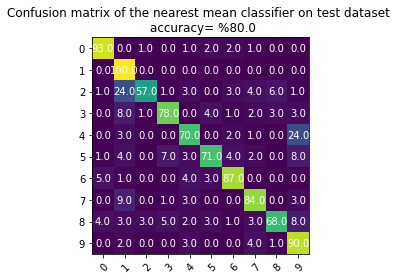

In [63]:
conf_matrix, acc = confusion_matrix(np.array(test_labels), classes)
draw_conf_matrix(conf_matrix, acc, kval=0, train_or_test ='test')

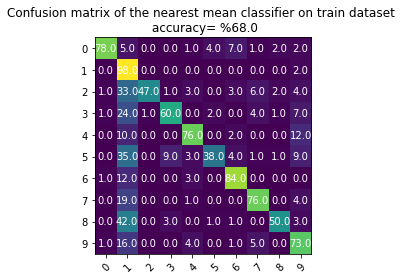

In [65]:
classes = classfy_images_nearest_mean(nearest_mean_array, train_images)

conf_matrix, acc = confusion_matrix(np.array(train_labels), classes)
draw_conf_matrix(conf_matrix, acc, kval=0, train_or_test ='train')

In [66]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

def knn_classifier(k, train_images, train_labels, test_image):
    
    distances = []
    
    for train_image in train_images:
        diff = train_image - test_image
        diff = np.square(diff)
        diff = diff.sum()
        diff = diff**(0.5)
        
        distances.append(diff)
    distances = np.array(distances)
    
    index_of_mininum_k_distances = np.argpartition(distances, k)[:k]
    
    k_labels = np.take(train_labels, index_of_mininum_k_distances)
    class_of_the_test_image = np.bincount(k_labels).argmax()
    
    return class_of_the_test_image
    
    
def classfy_images_knn(k, train_images, train_labels, test_images):
    
    classes = []
    
    for test_image in test_images:
        
        class_of_the_test_image = knn_classifier(k, train_images, train_labels, test_image)
        classes.append(class_of_the_test_image)
        
    return classes

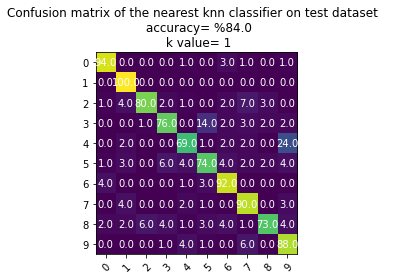

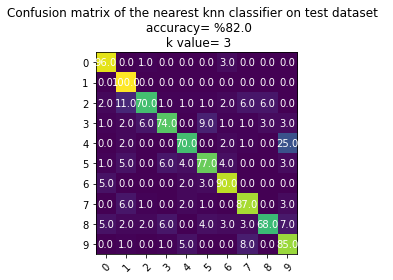

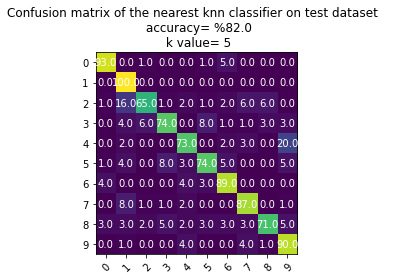

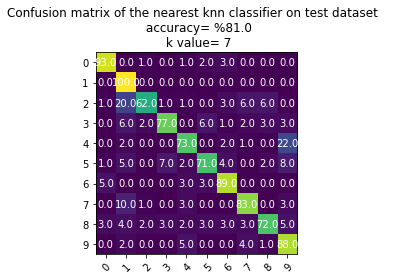

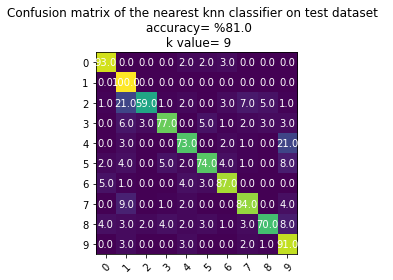

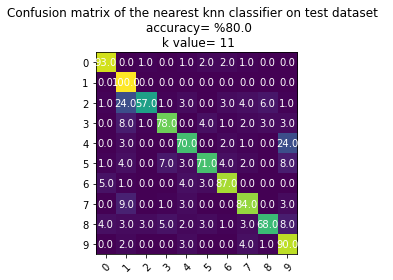

In [69]:
k_vals = [1, 3, 5, 7, 9, 11]
accs_test = []
for k in k_vals:
    
    classes = classfy_images_knn(k, train_images, train_labels, test_images)
    conf_matrix, acc = confusion_matrix(np.array(test_labels), classes)
    accs_test.append(acc * 100)
    draw_conf_matrix(conf_matrix, acc, k, 'test')

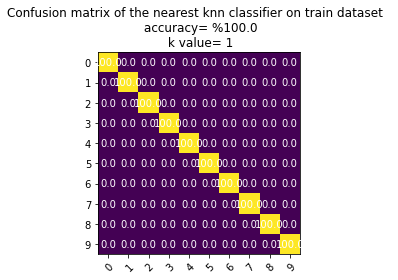

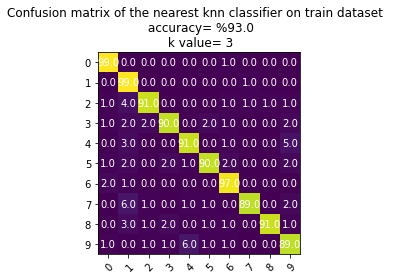

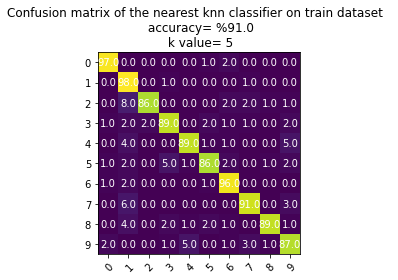

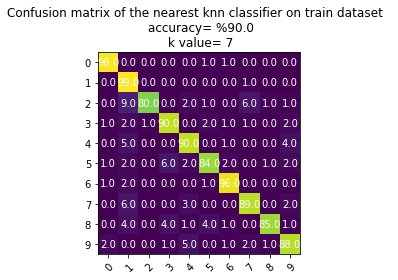

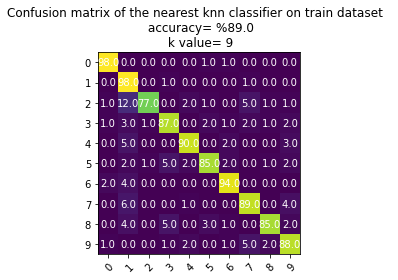

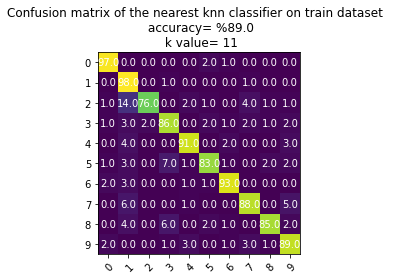

In [70]:
k_vals = [1, 3, 5, 7, 9, 11]
accs_train = []
for k in k_vals:
    
    classes = classfy_images_knn(k, train_images, train_labels, train_images)
    conf_matrix, acc = confusion_matrix(np.array(test_labels), classes)
    accs_train.append(acc * 100)
    draw_conf_matrix(conf_matrix, acc, k, 'train')

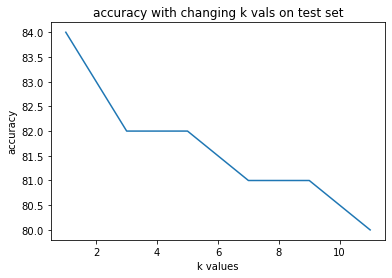

In [74]:
plt.plot(k_vals, accs_test)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('accuracy with changing k vals on test set')
plt.show()

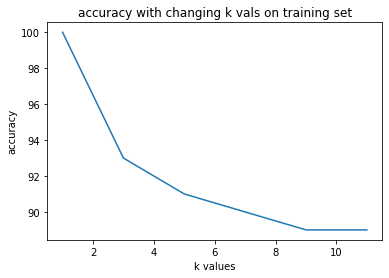

In [76]:
plt.plot(k_vals, accs_train)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.title('accuracy with changing k vals on training set')
plt.show()